# Car Price Prediction

### Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market.

Now some cars are in demand hence making them costly and some are not in demand hence cheaper. 

One of clients works with small traders, who sell used cars. 

With the change in market due to covid 19 impact, The client is facing problems with their previous car price valuation machine learning models. 

So, they are looking for new machine learning models from new data. We have to make car price valuation model.

### Model Building Phase 


After collecting/scraping the data, we have around 5000 rows and 9 columns.

We need to build a machine learning model. 

Before model building, we will be doing data pre-processing steps. We will try different models with different hyper parameters and select the best model.

### Features

#### Here's a brief version of what features is in the data description file:

1. Brand Name: Model and brand name of the car.
2. Year : Year of manufacturing/ model launch year
3. Car_variant : Model type
4. Selling Price : The price on which the car is available on the website
5. Kilometers_Driven: How many kms the car is driven till now
6. Fuel_Type: if the model run by petrol or diesel
7. Transmission : If the model is run manually or automatic
8. Owner_Type: How many owners are there or source of car
9. Location: Which city of India the car is avaiable

###### Here selling price is the target feature

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

### Loading The Dataset

In [2]:
cars_df = pd.read_csv("Old_Car_details.csv")
cars_df

,Brand Name,Year,Car_variant,Selling Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location
0,Mercedes Benz E Class,2013,E 250 CDI AVANTGARDE,1455599,42881,Diesel,Automatic,2nd Owner,New Delhi
1,Honda City,2014,V MT PETROL,571499,51778,Petrol,Manual,1st Owner,New Delhi
2,Volkswagen Polo,2016,COMFORTLINE 1.2L PETROL,420399,59206,Petrol,Manual,2nd Owner,New Delhi
3,Maruti Wagon R 1.0,2014,LXI,333199,62798,Petrol,Manual,1st Owner,New Delhi
4,Honda City,2020,ZX CVT,1456371,9928,Petrol,Automatic,1st Owner,New Delhi
...,...,...,...,...,...,...,...,...,...
5053,Honda Civic,2019,VX Diesel,1450000,48523,Diesel,Manual,NaN,New Delhi
5054,Datsun RediGO,2017,1.0 S,220000,34683,Petrol,Manual,NaN,New Delhi
5055,Toyota Innova Crysta,2020,2.4 GX 7 STR AT,1939000,76317,Diesel,Automatic,NaN,New Delhi
5056,Maruti Swift,2017,LDI Optional,419000,82011,Diesel,Manual,NaN,New Delhi


The dataset has 5058 rows and 10 columns out of which Selling Price is the target column.

In [3]:
cars_df.tail()

,Brand Name,Year,Car_variant,Selling Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location
5053,Honda Civic,2019,VX Diesel,1450000,48523,Diesel,Manual,NaN,New Delhi
5054,Datsun RediGO,2017,1.0 S,220000,34683,Petrol,Manual,NaN,New Delhi
5055,Toyota Innova Crysta,2020,2.4 GX 7 STR AT,1939000,76317,Diesel,Automatic,NaN,New Delhi
5056,Maruti Swift,2017,LDI Optional,419000,82011,Diesel,Manual,NaN,New Delhi
5057,Maruti Baleno,2019,Delta,690000,35992,Petrol,Manual,NaN,New Delhi


In [4]:
cars_df.shape

(5058, 9)

In [5]:
cars_df.columns

Index(['Brand Name', 'Year', 'Car_variant', 'Selling Price',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Location'],
      dtype='object')

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand Name         5058 non-null   object
 1   Year               5058 non-null   int64 
 2   Car_variant        5058 non-null   object
 3   Selling Price      5058 non-null   int64 
 4   Kilometers_Driven  5058 non-null   int64 
 5   Fuel_Type          5058 non-null   object
 6   Transmission       5002 non-null   object
 7   Owner_Type         4898 non-null   object
 8   Location           5058 non-null   object
dtypes: int64(3), object(6)
memory usage: 355.8+ KB


The dataset has 3 numerical columns out of which Selling price is also one which is target column. 

Rest 6 columns are object dtype.

### Separating Brand and Model name From Brand name column

In [7]:
cars_df['Brand']=cars_df['Brand Name'].str.extract(r'(\w+)\b')
cars_df.head()

,Brand Name,Year,Car_variant,Selling Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location,Brand
0,Mercedes Benz E Class,2013,E 250 CDI AVANTGARDE,1455599,42881,Diesel,Automatic,2nd Owner,New Delhi,Mercedes
1,Honda City,2014,V MT PETROL,571499,51778,Petrol,Manual,1st Owner,New Delhi,Honda
2,Volkswagen Polo,2016,COMFORTLINE 1.2L PETROL,420399,59206,Petrol,Manual,2nd Owner,New Delhi,Volkswagen
3,Maruti Wagon R 1.0,2014,LXI,333199,62798,Petrol,Manual,1st Owner,New Delhi,Maruti
4,Honda City,2020,ZX CVT,1456371,9928,Petrol,Automatic,1st Owner,New Delhi,Honda


In [8]:
model=cars_df['Brand Name'].str.split().str[1:]
cars_df['Model']=[' '.join(map(str, l)) for l in model]
cars_df.head()

,Brand Name,Year,Car_variant,Selling Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location,Brand,Model
0,Mercedes Benz E Class,2013,E 250 CDI AVANTGARDE,1455599,42881,Diesel,Automatic,2nd Owner,New Delhi,Mercedes,Benz E Class
1,Honda City,2014,V MT PETROL,571499,51778,Petrol,Manual,1st Owner,New Delhi,Honda,City
2,Volkswagen Polo,2016,COMFORTLINE 1.2L PETROL,420399,59206,Petrol,Manual,2nd Owner,New Delhi,Volkswagen,Polo
3,Maruti Wagon R 1.0,2014,LXI,333199,62798,Petrol,Manual,1st Owner,New Delhi,Maruti,Wagon R 1.0
4,Honda City,2020,ZX CVT,1456371,9928,Petrol,Automatic,1st Owner,New Delhi,Honda,City


In [9]:
# Since we have separated the Brand and Model name from Brand name column, we will drop the Brand Name column
cars_df.drop("Brand Name",axis =1,inplace = True)
cars_df

,Year,Car_variant,Selling Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location,Brand,Model
0,2013,E 250 CDI AVANTGARDE,1455599,42881,Diesel,Automatic,2nd Owner,New Delhi,Mercedes,Benz E Class
1,2014,V MT PETROL,571499,51778,Petrol,Manual,1st Owner,New Delhi,Honda,City
2,2016,COMFORTLINE 1.2L PETROL,420399,59206,Petrol,Manual,2nd Owner,New Delhi,Volkswagen,Polo
3,2014,LXI,333199,62798,Petrol,Manual,1st Owner,New Delhi,Maruti,Wagon R 1.0
4,2020,ZX CVT,1456371,9928,Petrol,Automatic,1st Owner,New Delhi,Honda,City
...,...,...,...,...,...,...,...,...,...,...
5053,2019,VX Diesel,1450000,48523,Diesel,Manual,NaN,New Delhi,Honda,Civic
5054,2017,1.0 S,220000,34683,Petrol,Manual,NaN,New Delhi,Datsun,RediGO
5055,2020,2.4 GX 7 STR AT,1939000,76317,Diesel,Automatic,NaN,New Delhi,Toyota,Innova Crysta
5056,2017,LDI Optional,419000,82011,Diesel,Manual,NaN,New Delhi,Maruti,Swift


In [10]:
# For numerical columns
cars_df.describe()

,Year,Selling Price,Kilometers_Driven
count,5058.000000,5.058000e+03,5058.000000
mean,2016.989522,6.635944e+05,45276.486754
std,2.381643,3.782556e+05,30852.522149
min,2008.000000,1.923990e+05,71.000000
25%,2015.000000,4.233240e+05,22713.750000
50%,2017.000000,5.608790e+05,39888.000000
75%,2019.000000,7.771740e+05,62221.000000
max,2022.000000,6.100000e+06,353688.000000


In [11]:
# For categorical columns
cars_df.select_dtypes(include="object").describe()

,Car_variant,Fuel_Type,Transmission,Owner_Type,Location,Brand,Model
count,5058,5058,5002,4898,5058,5058,5058
unique,752,5,2,4,10,21,145
top,VXI,Petrol,Manual,1st Owner,New Delhi,Maruti,Swift
freq,491,3437,4209,3882,866,2346,398


In [12]:
# For train data
cat_col_tr = cars_df.select_dtypes(include ="object")
for i in cat_col_tr:
    print(i)
    print(cat_col_tr[i].value_counts())
    print('\n')

Car_variant
VXI                        491
LXI                        244
VDI                        221
DELTA 1.2 K12              191
SPORTZ 1.2 KAPPA VTVT      105
                          ... 
ERA PLUS (O)                 1
Highline 1.0 AT Petrol       1
1.0 TURBO GDI S IMT          1
LXI LPG                      1
LDI Optional                 1
Name: Car_variant, Length: 752, dtype: int64


Fuel_Type
Petrol          3437
Diesel          1554
Petrol + CNG      62
CNG                4
Petrol + LPG       1
Name: Fuel_Type, dtype: int64


Transmission
Manual       4209
Automatic     793
Name: Transmission, dtype: int64


Owner_Type
1st Owner    3882
2nd Owner     922
3rd Owner      91
4th Owner       3
Name: Owner_Type, dtype: int64


Location
New Delhi    866
Noida        706
Gurgaon      706
Mumbai       601
Chennai      552
Pune         439
Bengaluru    387
Ahmedabad    383
Hyderabad    244
Kolkata      174
Name: Location, dtype: int64


Brand
Maruti        2346
Hyundai       1052

### Checking and Removing the null values

In [13]:
cars_df.isnull().sum()

Year                   0
Car_variant            0
Selling Price          0
Kilometers_Driven      0
Fuel_Type              0
Transmission          56
Owner_Type           160
Location               0
Brand                  0
Model                  0
dtype: int64

There are null values in Transmission column and Owner_Type. We will remove the using simple imputer(mostfrequent) as they are categorical in nature.

<AxesSubplot:>

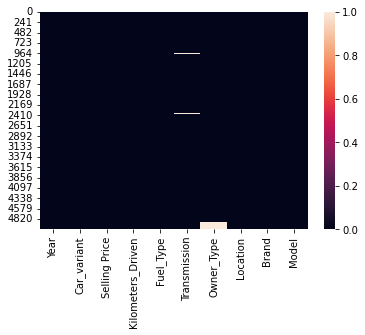

In [14]:
sns.heatmap(cars_df.isnull())

In [15]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

cars_df["Transmission"]= imp.fit_transform(cars_df["Transmission"].values.reshape(-1,1))
cars_df["Owner_Type"]= imp.fit_transform(cars_df["Owner_Type"].values.reshape(-1,1))

In [16]:
#Again checking the null values
cars_df.isnull().sum()

Year                 0
Car_variant          0
Selling Price        0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Location             0
Brand                0
Model                0
dtype: int64

## Univariate Analysis

In [17]:
#descriptive statistics summary
cars_df['Selling Price'].describe()

count    5.058000e+03
mean     6.635944e+05
std      3.782556e+05
min      1.923990e+05
25%      4.233240e+05
50%      5.608790e+05
75%      7.771740e+05
max      6.100000e+06
Name: Selling Price, dtype: float64

<AxesSubplot:>

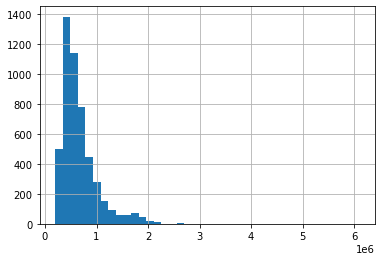

In [18]:
#histogram
cars_df['Selling Price'].hist(bins = 40)

Here we can see the target column is right skewed. Checking the skewness.

In [19]:
#skewness & kurtosis
print("Skewness: %f" % cars_df['Selling Price'].skew())
print("Kurtosis: %f" % cars_df['Selling Price'].kurt())

Skewness: 3.277941
Kurtosis: 25.861284


Removing skewness using log transformation

<AxesSubplot:>

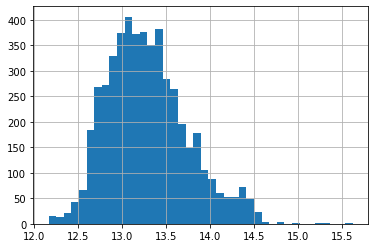

In [20]:
#log transform the target 
cars_df["Selling Price"] = np.log1p(cars_df["Selling Price"])

#histogram
cars_df['Selling Price'].hist(bins = 40)

Now the data in target column is uniformly distributed

In [21]:
#skewness & kurtosis
print("Skewness: %f" % cars_df['Selling Price'].skew())
print("Kurtosis: %f" % cars_df['Selling Price'].kurt())

Skewness: 0.602862
Kurtosis: 0.395709


### Checking distribution of numerical columns using scatter plot

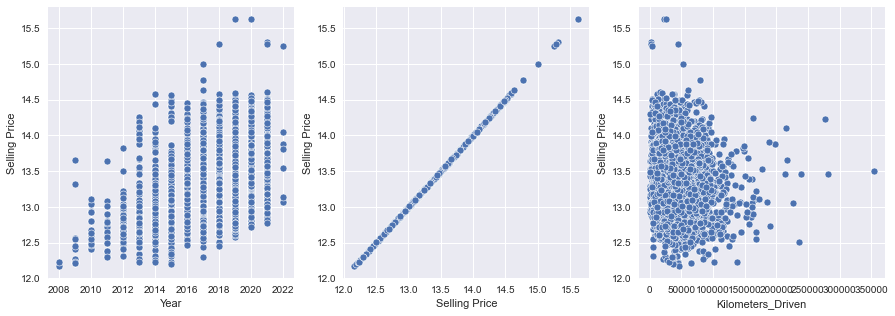

In [22]:
plt.figure(figsize=[15,5])
num_var = cars_df.select_dtypes(exclude= ["O"]).columns
plt.style.use("seaborn")
for i,col in enumerate(num_var):
    plt.subplot(1,3,i+1)
    sns.scatterplot(cars_df[col],cars_df['Selling Price'])
plt.show()

#### Checking skewness using distplot

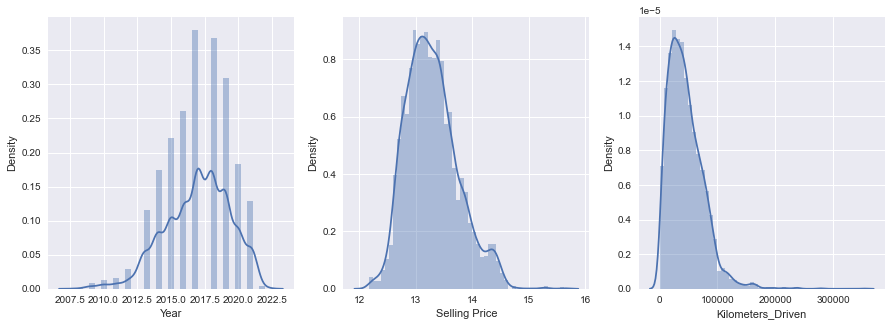

In [23]:
plt.figure(figsize=[15,5])
num_var = cars_df.select_dtypes(exclude= ["O"]).columns
plt.style.use("seaborn")
for i,col in enumerate(num_var):
    plt.subplot(1,3,i+1)
    sns.distplot(cars_df[col])
plt.show()

We can see the data in numerical columns are uniformly distributed.

### For Categorical Columns

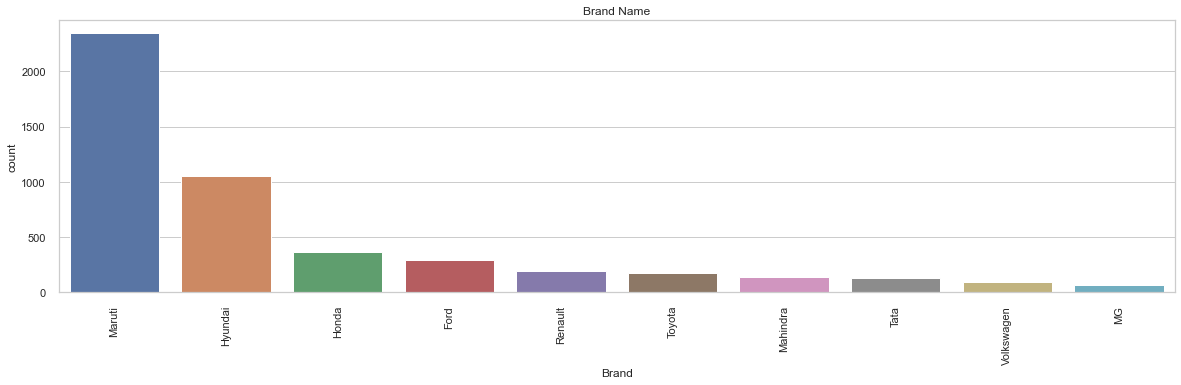

In [24]:
# Checking Top 10 selling brands of cars
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
sns.countplot(cars_df['Brand'],order=cars_df['Brand'].value_counts().iloc[:10].index)
plt.title("Brand Name")
plt.xticks(rotation=90)
plt.show()

We can see from above count plot, Maruti is the highest selling brand followed by Hyundai. This may be because of their genuine price with genuine features.

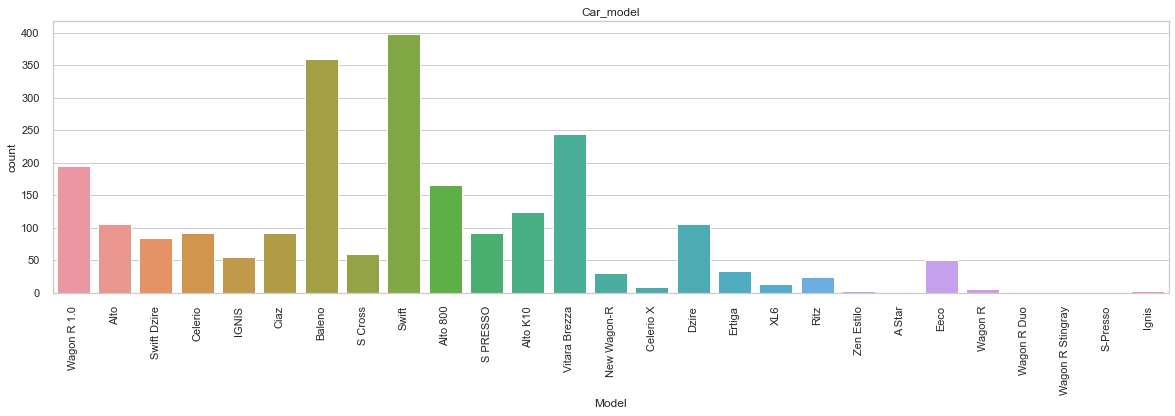

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
sns.countplot(cars_df[cars_df['Brand']=="Maruti"]['Model'])
plt.title("Car_model")
plt.xticks(rotation=90)
plt.show()

From the above count plot we can see Maruti Swift model is highest selling model, folled by Baleno And Brezza.

### Bivariate Analysis

<AxesSubplot:title={'center':'comparison between Brand and Selling Price'}, xlabel='Brand', ylabel='Selling Price'>

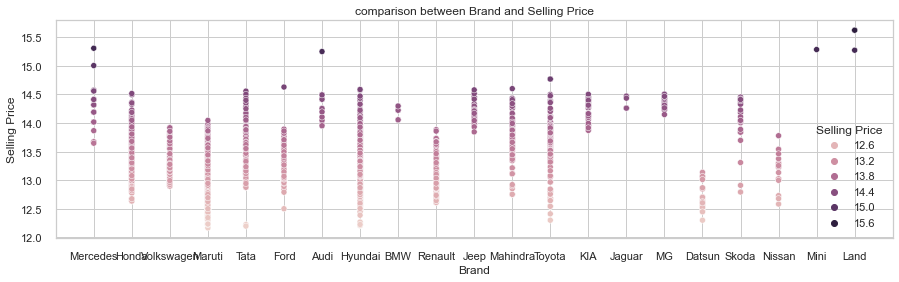

In [26]:
plt.figure(figsize=[15,4])
plt.title("comparison between Brand and Selling Price")
sns.scatterplot(cars_df['Brand'],cars_df['Selling Price'],hue=cars_df["Selling Price"])

Here we can Land Rover, Mercedes, Audi have highest selling Price as they are top brands .

<AxesSubplot:title={'center':'comparison between Fuel_Type and Selling Price'}, xlabel='Fuel_Type', ylabel='Selling Price'>

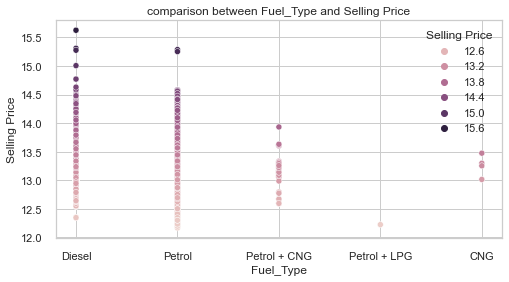

In [27]:
plt.figure(figsize=[8,4])
plt.title("comparison between Fuel_Type and Selling Price")
sns.scatterplot(cars_df['Fuel_Type'],cars_df['Selling Price'],hue=cars_df["Selling Price"])

We can see from the above plot that Diesel cars are costly .They have highest selling price, followed by petrol cars. Petrol+LPG have lowest selling price.

<AxesSubplot:title={'center':'comparison between Kilometers_Driven and Selling Price'}, xlabel='Kilometers_Driven', ylabel='Selling Price'>

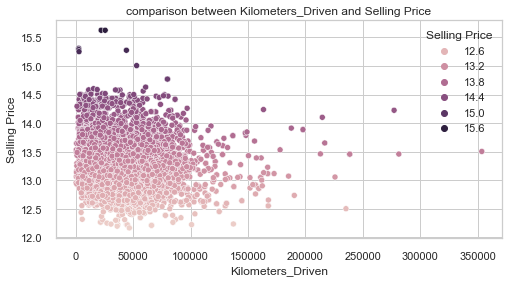

In [28]:
plt.figure(figsize=[8,4])
plt.title("comparison between Kilometers_Driven and Selling Price")
sns.scatterplot(cars_df['Kilometers_Driven'],cars_df['Selling Price'],hue=cars_df["Selling Price"])

Selling Price does not depend much on Kilometer_driven. It is mainly affected by Model of the cars and the fuel type together with Kilometer Driven.

## Multivariate Analysis

### Converting Categorical to Numerical columns

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cars_df=cars_df.apply(LabelEncoder().fit_transform)
print(cars_df.head())

   Year  Car_variant  Selling Price  Kilometers_Driven  Fuel_Type  \
0     5          307           2779               2054          1   
1     6          567           1396               2443          2   
2     8          275            649               2693          2   
3     6          390            246               2806          2   
4    12          713           2780                320          2   

   Transmission  Owner_Type  Location  Brand  Model  
0             0           1         7     13     19  
1             1           0         7      4     30  
2             1           1         7     20     90  
3             1           0         7     12    129  
4             0           0         7      4     30  


### Checking the Correlation

In [30]:
cars_df.corr()

,Year,Car_variant,Selling Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location,Brand,Model
Year,1.000000,-0.017356,0.464848,-0.573603,0.256882,-0.133418,-0.155071,-0.097031,0.068272,-0.141142
Car_variant,-0.017356,1.000000,-0.175976,-0.006900,0.002002,0.042313,-0.033062,-0.043252,0.363761,0.208918
Selling Price,0.464848,-0.175976,1.000000,-0.156447,-0.212183,-0.351653,-0.073146,0.095733,-0.115985,0.007510
Kilometers_Driven,-0.573603,-0.006900,-0.156447,1.000000,-0.412792,0.086872,0.060586,0.057054,-0.015772,0.094502
Fuel_Type,0.256882,0.002002,-0.212183,-0.412792,1.000000,-0.070397,0.003218,-0.189118,0.007278,-0.229679
Transmission,-0.133418,0.042313,-0.351653,0.086872,-0.070397,1.000000,-0.017160,-0.066326,0.021016,0.005424
Owner_Type,-0.155071,-0.033062,-0.073146,0.060586,0.003218,-0.017160,1.000000,-0.051267,-0.050413,0.017505
Location,-0.097031,-0.043252,0.095733,0.057054,-0.189118,-0.066326,-0.051267,1.000000,0.015999,0.062634
Brand,0.068272,0.363761,-0.115985,-0.015772,0.007278,0.021016,-0.050413,0.015999,1.000000,0.114352
Model,-0.141142,0.208918,0.007510,0.094502,-0.229679,0.005424,0.017505,0.062634,0.114352,1.000000


<AxesSubplot:>

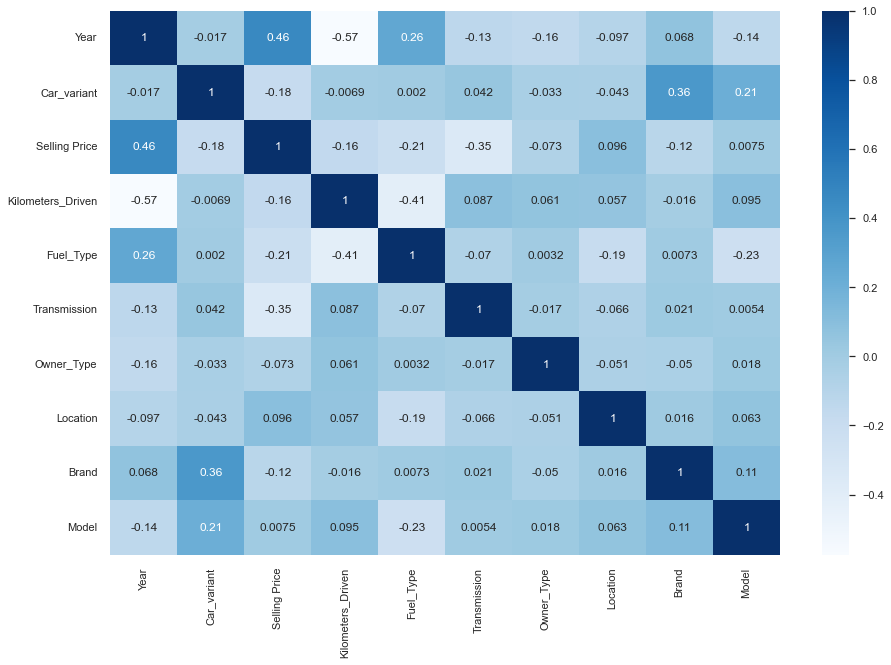

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(cars_df.corr(),cmap='Blues',annot=True)

### Data preprocessing

In [32]:
X = cars_df.drop('Selling Price', axis=1)
y = cars_df['Selling Price'].values

### Checking Outliers

Year                    AxesSubplot(0.125,0.657941;0.168478x0.222059)
Car_variant          AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Kilometers_Driven    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Fuel_Type            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Transmission            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Owner_Type           AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Location             AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Brand                AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Model                      AxesSubplot(0.125,0.125;0.168478x0.222059)
dtype: object

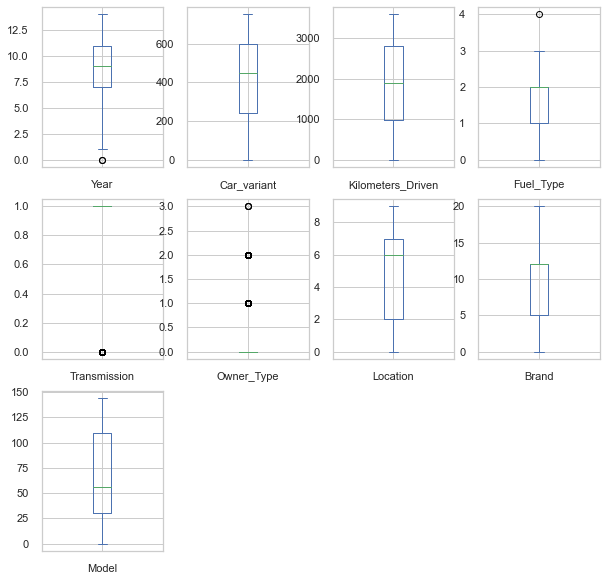

In [33]:
X.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

There is not much outliers in numerical columns . Very Few are there in categorical columns which don't need to be removed.

### Feature Scalling

In [34]:
X.head()

,Year,Car_variant,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Location,Brand,Model
0,5,307,2054,1,0,1,7,13,19
1,6,567,2443,2,1,0,7,4,30
2,8,275,2693,2,1,1,7,20,90
3,6,390,2806,2,1,0,7,12,129
4,12,713,320,2,0,0,7,4,30


In [35]:
# Performing Standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
X

array([[-1.67527846, -0.52966998,  0.17577689, ...,  0.74026909,
         0.67237607, -1.11171284],
       [-1.25535882,  0.72876416,  0.54772628, ...,  0.74026909,
        -1.26827214, -0.85948336],
       [-0.41551954, -0.68455418,  0.7867683 , ...,  0.74026909,
         2.18176913,  0.51631381],
       ...,
       [ 1.26415903, -1.11532587,  1.21991245, ...,  0.74026909,
         1.96614155, -0.05693501],
       [ 0.00440011, -0.18118053,  1.32987178, ...,  0.74026909,
         0.45674849,  0.97491287],
       [ 0.84423939, -0.55871077, -0.15792577, ...,  0.74026909,
         0.45674849, -1.20343265]])

## Model Building

### Finding Best Random State

In [37]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.5114352057819835 on Random State 65


### Checking with different algorithms

In [38]:
model = [LinearRegression(),Lasso(alpha=1.0),Ridge(alpha=1.0),DecisionTreeRegressor(criterion='squared_error'),
         KNeighborsRegressor()]
for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state =maxRS)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print('Train Score of', i , 'is:' , i.score(X_train1,y_train1))
    print("r2_score", r2_score(y_test1, pred))
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

Train Score of LinearRegression() is: 0.4457805727969435
r2_score 0.5114352057819835
mean_squred_error 362295.469020395
RMSE 601.9098512405284 

Train Score of Lasso() is: 0.4457639554424073
r2_score 0.5111749877628557
mean_squred_error 362488.4338234328
RMSE 602.0701236761652 

Train Score of Ridge() is: 0.4457805228324798
r2_score 0.5114169961822416
mean_squred_error 362308.9723582476
RMSE 601.9210682126417 

Train Score of DecisionTreeRegressor() is: 1.0
r2_score 0.9167210567288271
mean_squred_error 61755.54229249012
RMSE 248.50662424267512 

Train Score of KNeighborsRegressor() is: 0.8265299936287829
r2_score 0.7436734225357128
mean_squred_error 190079.102513834
RMSE 435.9806217182525 



Have checked Multiple Model and their score also. I have found that Decision tree regressor model is overfitting. Other models are working well. But KNeighborsRegressor is having less train and test score difference with least mean square error and least RMSE. Now i will check with ensemble method to boost up score.

### Using Ensemble Technique to boostup score

### RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=maxRS,criterion='squared_error', min_samples_split=2, min_samples_leaf=1)
#RandomForestClassifier(100)---Default
rf.fit(X_train1,y_train1)
predrf=rf.predict(X_test1)
print('Train Score of', rf , 'is:' , rf.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predrf))
print("mean_squred_error", mean_squared_error(y_test1, predrf))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predrf)))

Train Score of RandomForestRegressor(random_state=65) is: 0.992142228456897
r2_score 0.9480528948680718
mean_squred_error 38521.401952727276
RMSE 196.26869835184436


### AdaBoostRegressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor

ABr=AdaBoostRegressor( base_estimator=KNeighborsRegressor(),n_estimators=50,learning_rate=1.0,loss='linear',random_state=maxRS,)
#RandomForestClassifier(50)---Default
ABr.fit(X_train1,y_train1)
predAbr=ABr.predict(X_test1)
print('Train Score of', ABr , 'is:' , ABr.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predAbr))
print("mean_squred_error", mean_squared_error(y_test1, predAbr))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predAbr)))

Train Score of AdaBoostRegressor(base_estimator=KNeighborsRegressor(), random_state=65) is: 0.91079138752551
r2_score 0.769914374515491
mean_squred_error 170620.11136758892
RMSE 413.06187353420665


### GradientBoostingRegressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient_Boost=GradientBoostingRegressor(n_estimators=100,loss='squared_error',learning_rate=0.1,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)
#GradientBoostingRegressor(100)---Default
Gradient_Boost.fit(X_train1,y_train1)
predgb=Gradient_Boost.predict(X_test1)
print('Train Score of', Gradient_Boost , 'is:' , Gradient_Boost.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predgb))
print("mean_squred_error", mean_squared_error(y_test1, predgb))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predgb)),"\n")

Train Score of GradientBoostingRegressor() is: 0.8874196455796406
r2_score 0.8907286757861235
mean_squred_error 81030.2054611003
RMSE 284.65805005497435 



## Conclusion

Here we can see the least difference between train score and test score is coming in GradientBoostingRegressor.So model is working well with both train model and test model.

For AdaBoostRegressor, the difference is high, So the model is overfitting.

For RandomForestRegressor, the difference is also more as compared to GradientBoostingRegressor.

#### So selecting GradientBoostingRegressor as final model

### Hyper Parameter Tuning

In [42]:
#Using GradientBoostingRegressor for hyper parameter tuning
Gradient_Boost = GradientBoostingRegressor()
Para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

Rand_search = RandomizedSearchCV(Gradient_Boost,Para,cv = 6,scoring = "r2",n_jobs =-1,verbose = 2) 
Rand_search.fit(X_train1,y_train1)
print(Rand_search.best_params_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
{'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}


In [43]:
prediction = Rand_search.predict(X_test1)

In [44]:
Selling_Price = GradientBoostingRegressor(n_estimators= 400, max_depth= 5, learning_rate =0.1)
Selling_Price.fit(x_train, y_train)
pred = Selling_Price.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 96.53633686874088
RMSE value: 153.79231069761963


### Plotting the residuals.

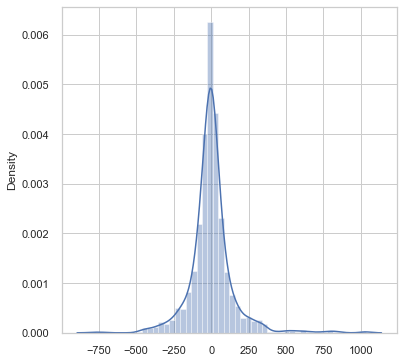

In [45]:
plt.figure(figsize = (6,6))
sns.distplot(y_test1-prediction)
plt.show()

As we can see that most of the residuals are 0, which means our model is generalizing well.

### Cross Validation

In [46]:
best_Gradient_Boost = GradientBoostingRegressor(n_estimators= 400, max_depth= 5, learning_rate =0.1)

for i in range(2,11):
    cross_score = cross_val_score(best_Gradient_Boost,X,y,cv = i,n_jobs = -1) 
    print(i,"mean",cross_score.mean() ,"and STD" , cross_score.std())

2 mean 0.8380842442330149 and STD 0.00288754603783814
3 mean 0.9224639863369152 and STD 0.027934095280083972
4 mean 0.9284048196212812 and STD 0.039095124408256465
5 mean 0.9383289210626959 and STD 0.042590505651628786
6 mean 0.9466203344229879 and STD 0.04180172392736958
7 mean 0.9410414064294315 and STD 0.039573049874727075
8 mean 0.9476726460699434 and STD 0.04081683012019013
9 mean 0.9512681566255916 and STD 0.03796901670058452
10 mean 0.9479688678515407 and STD 0.041074303564142725


##### Selecting Cv score as 6

In [47]:
# Cross validate of RandomForestRegressor using cv=6
from sklearn.model_selection import cross_val_score
score=cross_val_score(best_Gradient_Boost,X,y,cv=6,scoring='r2')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.99113988 0.98944797 0.96760651 0.93482256 0.92503071 0.87510162]
Mean Score: 0.9471915414112813
Standard Deviation: 0.04077352793900188


### Plotting y_test vs predictions.

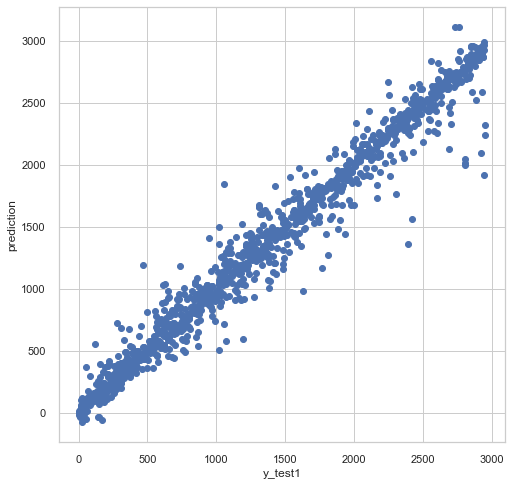

In [48]:
plt.figure(figsize = (8,8))
plt.scatter(y_test1, prediction)
plt.xlabel("y_test1")
plt.ylabel("prediction")
plt.show()

## Conclusion

I have scraped the old cars selling price from cars24 and Carsdekho websites for different cities in India. . Few independent variables are categorical in nature few are numerical and dependent variable Selling price is numerical data type. So applied regressoin method for prediction.

Once data has been cleaned, Label encoding applied on them to convert them into Numerical one.I have tried best algorithm and it has given top 5 features, i trained model on them but for most of the models, train and test data was having high variance, The model was overfitting.

Only GradientBoostregressor worked well out of all the models, as there was less difference between train score and test score and RMSE was also low.I have it as final model and have done further procesing. I got the r2 score as 96% after hyper parameter tuning which is a good score.